## 1D Ising Model

### 2020-09-24

### Jack Featherstone
### Joseph Lannan
### Ryan Branagan

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random 

N = 50 

def pbc(i):
    """ Periodic boundary conditions; 
      In python one does not have to take care of i-1, when i=0. This is because of Python convention a[-1] = a[len(a)-1]  
    """ 
    if (i>N-1):
        return i-N
    return i 

def sign(x):
    if (x<0):
        return -1 
    return  1 

def magnetization(S):
    """ Total magnetization """
    return sum(S) 

# J = 1
def energy_density(S,h):
    """ Energy density """ 
    nearneigh = [S[i]*S[i+1] for i in range(N-1)]
    nearneigh = nearneigh + [S[N-1]*S[0]]
    mag_int = -h*magnetization(S)
    return (-sum(nearneigh)+mag_int)/N

def deltaE (S, i, h):
    return (2*S[i]*(S[i-1]+S[pbc(i+1)]) + 2 * h * S[i])


def sweep(S, T, h):
    """ One sweep through the lattice -- usually N attempts to flip spins; here I use 2 N because I choose spins randomly """  
    for i in range(2*N):
        mc_step(S, T, h)

def skip(S, T, h, N=5):
    """ skip a few sweps for uncorrelated measurements """
    for i in range(N):
        sweep(S, T, h)

def correlation_func(x, N=20):
    k = np.array(range(N))
    C  = np.zeros(N) 
    y = x - sum(x)/len(x)
    for i in k:
        F = [ y[j]*y[j+i] for j in range(len(y)-N-1) ]
        C[i] = sum ( F ) #/ len(F)
    for i in range(1,N):
        C[i] = C[i]/C[0]
    C[0]=1
    return C

In [ ]:
def mc_step(S, T, h):
    """ Performce one MC step; returns True if the trial configuration is accepted """ 
    site = random.randint(0, N-1)
    dE = deltaE (S, site, h)
    acc_prob  = min(np.exp(-dE/T), 1) # ADD YOUR CODE HERE !!!!!!!!!!!!!!!!!!
    r = random.uniform(0,1)
    if (acc_prob>=r):
        S[site] = - S[site]
        return True
    return False 

def average (x):
    return sum(x) / len(x)# ADD YOUR CODE HERE  !!!!!!!!!!!!!!!!!!

def variance (x):
    return np.var(x)# ADD YOUR CODE HERE  !!!!!!!!!!!!!!!!!! 

def bootstrap(r, f, M): 
    O = []
    for i in range(M):
        x = random.choices(r,k=len(r))
        O.append( f(np.array(x)) ) 
  
    mean = average(O) # ADD YOUR CODE HERE !!!!!!!!!!!!!!!!!!
    var = variance(O) # ADD YOUR CODE HERE  !!!!!!!!!!!!!!!!!! 
    return (mean, np.sqrt(var)) 


In [ ]:
# Function to analyze thermalization: 
def thermalization(Temp, H):
    Scold =  np.zeros(N)+1
    Shot = np.array (  [sign(x) for x in np.random.uniform(-1,1,N) ] )

    Ecold = []
    Mcold = []
    Ehot = []
    Mhot = []

    for i in range(50000):
        Ecold.append(energy_density(Scold,H))
        Ehot.append(energy_density(Shot,H))
        Mcold.append(magnetization(Scold)/N)
        Mhot.append(magnetization(Shot)/N)
    
        mc_step(Scold, Temp, H)
        mc_step(Shot, Temp, H)

    return (Ecold,Ehot,Mcold,Mhot)

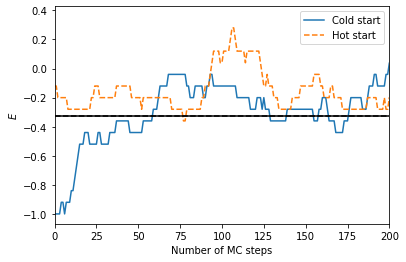

In [ ]:
# Plot E for each MC step, using 2 initial conditions -- hot and cold starts.  
(Ec,Eh,Mc,Mh) = thermalization(3, 0)
plt.plot(Ec,'-', label="Cold start")
plt.plot(Eh,'--', label="Hot start")

plt.plot([0,200],[sum(Ec)/len(Ec)]*2,'k-')
plt.plot([0,200],[sum(Eh)/len(Eh)]*2,'k--')

plt.xlim(0,200)
plt.xlabel('Number of MC steps')
plt.ylabel(r'$E$')
plt.legend()
plt.show()

Text(0, 0.5, '$C(k)$')

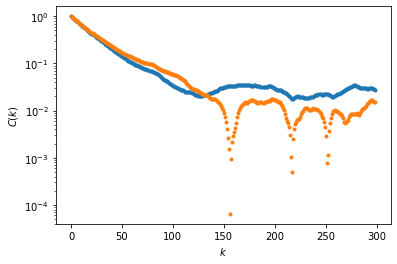

In [ ]:
# Plot C_E(k)
y = correlation_func(Ec, N=300)
plt.semilogy(np.abs(y),'.')
y = correlation_func(Eh, N=300)
plt.semilogy(np.abs(y),'.')
plt.xlabel('$k$')
plt.ylabel(r'$C(k)$')

In [ ]:
def ising_obs(Temp,H): 
    Scold =  np.zeros(N)+1
    Shot = np.array (  [sign(x) for x in np.random.uniform(-1,1,N) ] )

    Ecold = []
    Mcold = []
    Ehot = []
    Mhot = []

    ### add more observables to store below: 

    ###

    for i in range(30):   ### Thermalization --  to guranteee thermalization  
        sweep(Scold,Temp,H)
        sweep(Shot,Temp,H)


    for i in range(100):
        Ecold.append(energy_density(Scold,H))
        Ehot.append(energy_density(Shot,H))
        Mcold.append(magnetization(Scold)/N)
        Mhot.append(magnetization(Shot)/N)
        sweep(Scold,Temp,H)
        skip(Scold,Temp,H)
        sweep(Shot,Temp,H)
        skip(Shot,Temp,H)

    return (Ecold,Ehot,Mcold,Mhot)

In [ ]:
# Temperature dependence for <E> and <E^2> - <E>^2
arEc=[]
arEh=[]

arvEc=[]
arvEh=[]

arEc_err=[]
arEh_err=[]

arvEc_err=[]
arvEh_err=[]

temps = np.arange(1e-1,3,0.1)
for temp in temps:
    (Ec,Eh,Mc,Mh) = ising_obs(temp,0)
    aEc,aEc_err = bootstrap(Ec, average, 20)
    aEh,aEh_err = bootstrap(Eh, average, 20)
    arEc.append(aEc)
    arEc_err.append(aEc_err)
    arEh.append(aEh)
    arEh_err.append(aEh_err)

    vEc,vEc_err = bootstrap(Ec, variance, 20)
    vEh,vEh_err = bootstrap(Eh, variance, 20)
    arvEc.append(vEc)
    arvEc_err.append(vEc_err)
    arvEh.append(vEh)
    arvEh_err.append(vEh_err)

Text(0, 0.5, '$\\langle E \\rangle$')

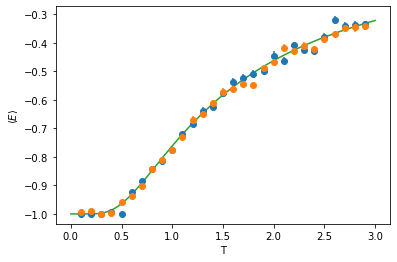

In [ ]:
x_analytic = np.linspace(1e-4,3,100)
y_analytic = -np.tanh(1/x_analytic)

plt.errorbar(temps,arEc,yerr=arEc_err,fmt='o')
plt.errorbar(temps,arEh,yerr=arEh_err,fmt='o')

plt.plot(x_analytic,y_analytic)

plt.xlabel('T')
plt.ylabel(r'$\langle E \rangle$')

<ipython-input-33-03ffaea01109>:2: RuntimeWarning: overflow encountered in cosh
  y_analytic = 1/N*1/np.cosh(1/x_analytic)**2


Text(0, 0.5, '$\\langle E^2 \\rangle - \\langle E \\rangle^2$')

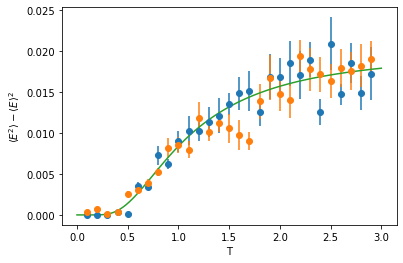

In [ ]:
x_analytic = np.linspace(1e-4,3,100)
y_analytic = 1/N*1/np.cosh(1/x_analytic)**2 

plt.errorbar(temps,arvEc,yerr=arvEc_err,fmt='o')
plt.errorbar(temps,arvEh,yerr=arvEh_err,fmt='o')

plt.plot(x_analytic,y_analytic)
plt.xlabel('T')
plt.ylabel(r'$\langle E^2 \rangle - \langle E \rangle^2$')

In [ ]:
print(np.shape(arvEc))

(29,)


# Plot $<E>$, $<M>$, $<M^2> - <M>^2$, $<E^2> - <E>^2$ dependence 
* on T for h = 0.1 and -0.1 
* on h for T = 0.1; 0.5; 1; 1.5; 2. 

Use bootstrap for the error estimate as done above. 

In [ ]:
### your code 
def ising_obs(Temp,H,N=100):
    # Start hot since it doens't matter
    SArr = np.array([sign(x) for x in np.random.uniform(-1,1,N)])

    EArr = np.zeros(N)
    MArr = np.zeros(N)

    for i in range(30):   ### Thermalization --  to guranteee thermalization  
        sweep(SArr,Temp,H)


    for i in range(N):
        EArr[i] = energy_density(SArr,H)
        MArr[i] = magnetization(SArr)/N
        sweep(SArr,Temp,H)
        skip(SArr,Temp,H)

    return (SArr, EArr, MArr)

def ising_eval(T, H, bootstrapM=20):

    (SArr, EArr, MArr) = ising_obs(T,H)
    E, EErr = bootstrap(EArr, average, bootstrapM)
    varE, varEErr = bootstrap(EArr, variance, bootstrapM)
    
    M, MErr = bootstrap(MArr, average, bootstrapM)
    varM, varMErr = bootstrap(MArr, variance, bootstrapM)
        
    return np.array([E, EErr, varE, varEErr, M, MErr, varM, varMErr])

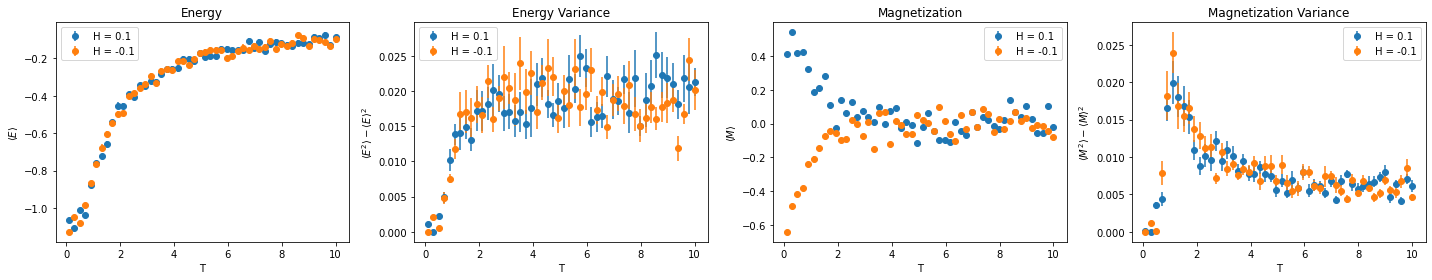

In [ ]:
# Constant H
HArr = [.1, -.1]
TArr = np.linspace(1e-1, 10, 50)

fig, ax = plt.subplots(1, 4, figsize=(20,4))

for i in range(len(HArr)):
    
    MArr = np.zeros(len(TArr))
    MErrArr = np.zeros(len(TArr))
    varMArr = np.zeros(len(TArr))
    varMErrArr = np.zeros(len(TArr))
    EArr = np.zeros(len(TArr))
    EErrArr = np.zeros(len(TArr))
    varEArr = np.zeros(len(TArr))
    varEErrArr = np.zeros(len(TArr))
    
    for j in range(len(TArr)):
        (EArr[j], EErrArr[j], varEArr[j], varEErrArr[j], MArr[j], MErrArr[j], varMArr[j], varMErrArr[j]) = ising_eval(TArr[j], HArr[i])
        
    ax[0].errorbar(TArr, EArr, yerr=EErrArr, fmt='o', label=f"H = {HArr[i]}")
    ax[1].errorbar(TArr, varEArr, yerr=varEErrArr, fmt='o', label=f"H = {HArr[i]}")
    ax[2].errorbar(TArr, MArr, yerr=MErrArr, fmt='o', label=f"H = {HArr[i]}")
    ax[3].errorbar(TArr, varMArr, yerr=varMErrArr, fmt='o', label=f"H = {HArr[i]}")

ax[0].set_title("Energy")
ax[0].set_xlabel("T")
ax[0].set_ylabel(r"$\langle E \rangle$")
ax[0].legend()

ax[1].set_title("Energy Variance")
ax[1].set_xlabel("T")
ax[1].set_ylabel(r"$\langle E^2 \rangle - \langle E \rangle^2$")
ax[1].legend()

ax[2].set_title("Magnetization")
ax[2].set_xlabel("T")
ax[2].set_ylabel(r"$\langle M \rangle$")
ax[2].legend()

ax[3].set_title("Magnetization Variance")
ax[3].set_xlabel("T")
ax[3].set_ylabel(r"$\langle M^2 \rangle - \langle M \rangle^2$")
ax[3].legend()

fig.tight_layout()
plt.show()

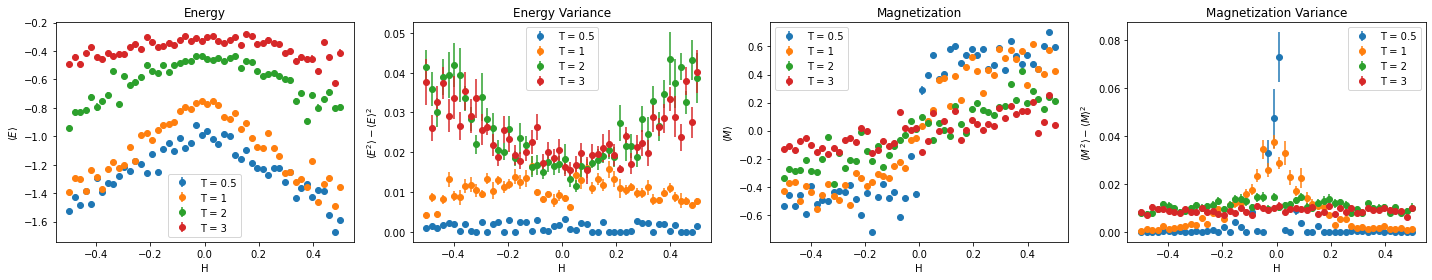

In [ ]:
# Constant T
TArr = [.5, 1, 2, 3]
HArr = np.linspace(-.5, .5, 50)

fig, ax = plt.subplots(1, 4, figsize=(20,4))

for i in range(len(TArr)):
    
    MArr = np.zeros(len(HArr))
    MErrArr = np.zeros(len(HArr))
    varMArr = np.zeros(len(HArr))
    varMErrArr = np.zeros(len(HArr))
    EArr = np.zeros(len(HArr))
    EErrArr = np.zeros(len(HArr))
    varEArr = np.zeros(len(HArr))
    varEErrArr = np.zeros(len(HArr))
    
    for j in range(len(HArr)):
        (EArr[j], EErrArr[j], varEArr[j], varEErrArr[j], MArr[j], MErrArr[j], varMArr[j], varMErrArr[j]) = ising_eval(TArr[i], HArr[j])
        
    ax[0].errorbar(HArr, EArr, yerr=EErrArr, fmt='o', label=f"T = {TArr[i]}")
    ax[1].errorbar(HArr, varEArr, yerr=varEErrArr, fmt='o', label=f"T = {TArr[i]}")
    ax[2].errorbar(HArr, MArr, yerr=MErrArr, fmt='o', label=f"T = {TArr[i]}")
    ax[3].errorbar(HArr, varMArr, yerr=varMErrArr, fmt='o', label=f"T = {TArr[i]}")

ax[0].set_title("Energy")
ax[0].set_xlabel("H")
ax[0].set_ylabel(r"$\langle E \rangle$")
ax[0].legend()

ax[1].set_title("Energy Variance")
ax[1].set_xlabel("H")
ax[1].set_ylabel(r"$\langle E^2 \rangle - \langle E \rangle^2$")
ax[1].legend()

ax[2].set_title("Magnetization")
ax[2].set_xlabel("H")
ax[2].set_ylabel(r"$\langle M \rangle$")
ax[2].legend()

ax[3].set_title("Magnetization Variance")
ax[3].set_xlabel("H")
ax[3].set_ylabel(r"$\langle M^2 \rangle - \langle M \rangle^2$")
ax[3].legend()

fig.tight_layout()
plt.show()

# Spin-spin correlation 

In [ ]:
def C_spins(Temp,H): 
    Scold =  np.zeros(N)+1
    Shot = np.array (  [sign(x) for x in np.random.uniform(-1,1,N) ] )

    Cc = []
    Ch = []


    for i in range(30):   ### Thermalization --  to guranteee thermalization  
        sweep(Scold,Temp,H)
        sweep(Shot,Temp,H)

    for i in range(1000):
        C = np.zeros(int(N/2))

        for k in range(int(N/2)):
            C[k] = sum (  [Scold[j]*Scold[j+k]  for j in range(N-int(N/2)-1) ] )
        for k in range(1, int(N/2)):
            C[k] = C[k]/C[0]
        C[0] = 1 
        Cc.append(C)

        for k in range(int(N/2)):
            C[k] = sum (  [Shot[j]*Shot[j+k]  for j in range(N-int(N/2)-1) ] )
        for k in range(1, int(N/2)):
            C[k] = C[k]/C[0]
        C[0] = 1
        Ch.append(C)

        sweep(Scold,Temp,H)
        skip(Scold,Temp,H)
        sweep(Shot,Temp,H)
        skip(Shot,Temp,H)

    return (Cc,Ch)

(0.001, 2)

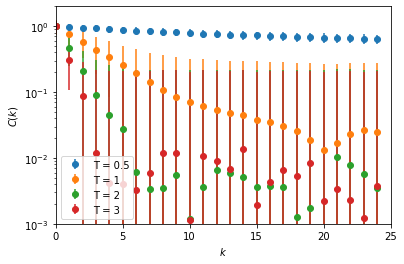

In [ ]:
TArr = [.5, 1, 2, 3]

for T in TArr:
    Cc,Ch =  C_spins(T,0) 

    Cc_av,CC_err = bootstrap(Cc, average, 20)
    Ch_av,Ch_err = bootstrap(Ch, average, 20)

    # Only plot the hot ones
    plt.errorbar(range(len(Ch_av)),np.abs(Ch_av),yerr=Ch_err,fmt='o', label=f"T = {T}")
    #plt.errorbar(range(len(Cc_av)),np.abs(Cc_av),yerr=Cc_err,fmt='o')
    
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$C(k)$')

plt.xlim(0,25)
plt.ylim(1e-3,2)